Testing using IBM Quantum Computers

In [10]:
import json
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, OptionsV2 as Options
import numpy as np
from quantum_check import construct_circuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution
from quantum_check import check_consistency

In [3]:
with open('key.json') as f:
    config = json.load(f)

ibm_api_key = config["ibm_api_key"]

QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_api_key, overwrite=True)

In [4]:
def classic_complexity(func: int, var: int) -> int: #O(m2^n)
    return func * (2**var)

#errors ϵ=0.0884 , ϵ=0.0625 , and ϵ=0.0442
def quantum_complexity(func: int, error: float) -> int: #O(mϵ^−2)
    return func / (error**2)

In [ ]:
terms = ["0x10","0xx0","x01x"]
var = 9 #n
func = 3 #m
error = 0.0884

print(f"Classical complexity: {classic_complexity(func, var)}")
print(f"Quantum complexity: {quantum_complexity(func, error)}")

Classical complexity: 1536
Quantum complexity: 383.8987735713846


Example 1: Consistent System in IBM Quantum Computer

In [6]:
service = QiskitRuntimeService()

backend = service.least_busy(operational=True)

#Data
terms = ["0x10","0xx0","x01x"]
var = 4 #n
func = 3 #m
shot = 64

circuit = construct_circuit(terms, var, func)
t_circuit = transpile(circuit, backend)

sampler = Sampler(mode=backend)

job = sampler.run([t_circuit], shots = shot)
result = job.result()

pub_result = result[0]
pub_counts = pub_result.data.measure_a.get_counts()

{'0111': 0.015625, '0000': 0.3125, '0010': 0.265625, '0011': 0.296875, '0100': 0.015625, '0001': 0.078125, '1111': 0.015625}
The system is inconsistent. C=0.770551750371122


False

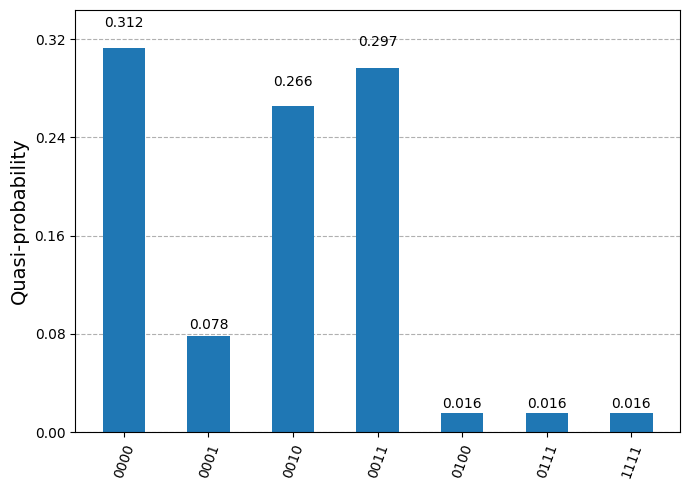

In [7]:
total_shots = sum(pub_counts.values())

probabilities = {k:v/shot for k,v in pub_counts.items()}
print(probabilities)

plot_distribution(probabilities);

check_consistency([probabilities.get('0011',0),probabilities.get('1100',0)])


Example 2: Inconsistent System on IBM Quantum Computer

In [ ]:
terms = ["0x11","0xx0","x01x"]
var = 4 #n
func = 3 #m
shot = 64

circuit = construct_circuit(terms, var, func)
t_circuit = transpile(circuit, backend)

sampler = Sampler(mode=backend)

job = sampler.run([t_circuit], shots = shot)
result = job.result()

pub_result = result[0]
pub_counts = pub_result.data.measure_a.get_counts()

{'0011': 0.359375, '1000': 0.046875, '1011': 0.03125, '1111': 0.046875, '0000': 0.34375, '0100': 0.0625, '1100': 0.09375, '0010': 0.015625}
The system is consistent. C=0.9519716382329886


True

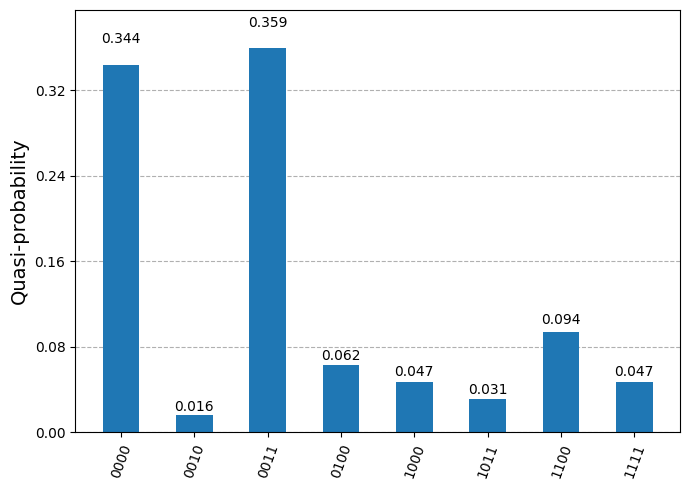

In [9]:
total_shots = sum(pub_counts.values())

probabilities = {k:v/shot for k,v in pub_counts.items()}
print(probabilities)

plot_distribution(probabilities);

check_consistency([probabilities.get('0011',0),probabilities.get('1100',0)])


TODO:

- Set up simulation and run in IBM
- Set up loop that goes through data.csv and use that data for simulation runs
- Compare theoretical vs. experimental values of simulation (plot graphs, have std on graph if possible)
    - Use error tolerance in analysis 
- Compare to results of classical
- Compare runtimes of classical vs. quantum for all data sets (plot graph comparing runtimes)
